___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [24]:
strategy = tf.distribute.TPUStrategy(resolver)

In [25]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [26]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [27]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### Data Wrangling

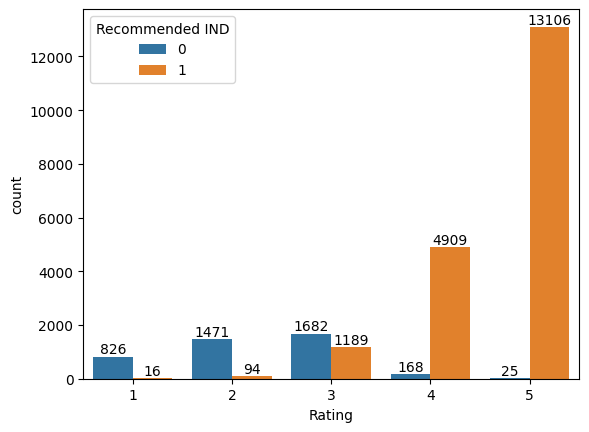

In [28]:
ax = sns.countplot(data = df, x ="Rating", hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

In [29]:
df["Recommended IND"].unique()

array([1, 0])

In [30]:
df = df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 2) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 3) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 4) & (df["Recommended IND"] == 0))]
df = df[~((df["Rating"] == 5) & (df["Recommended IND"] == 0))]

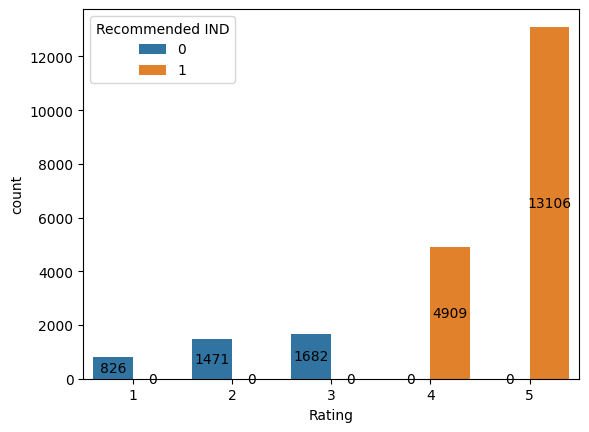

In [31]:
ax = sns.countplot(x="Rating", data=df, hue = "Recommended IND")
for p in ax.containers:
  ax.bar_label(p, label_type="center")

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

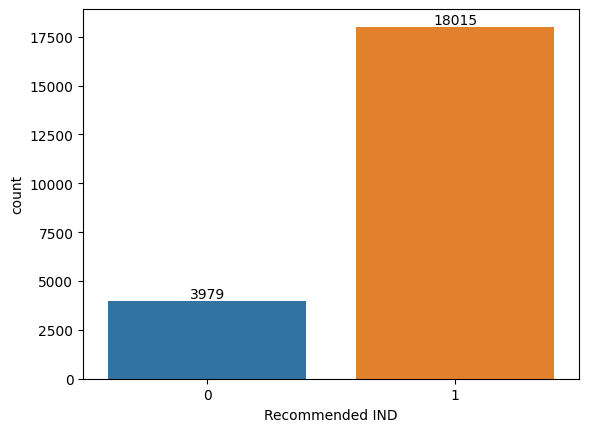

In [32]:

ax = sns.countplot(x="Recommended IND", data=df)
ax.bar_label(ax.containers[0]);

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [33]:
df.rename(columns={"Review Text":"text", "Recommended IND":"label"}, inplace=True)

In [34]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,text,Rating,label,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [35]:
df=df[['text','label']]
df.head()

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


---
---


### Missing Value Detection

In [36]:
df.isnull().sum()

text     819
label      0
dtype: int64

In [37]:
df.dropna(inplace = True)
df.reset_index(drop=True, inplace=True)
df

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
21170,I was surprised at the positive reviews for th...,0
21171,So i wasn't sure about ordering this skirt bec...,1
21172,I was very happy to snag this dress at such a ...,1
21173,"This fit well, but the top was very see throug...",0


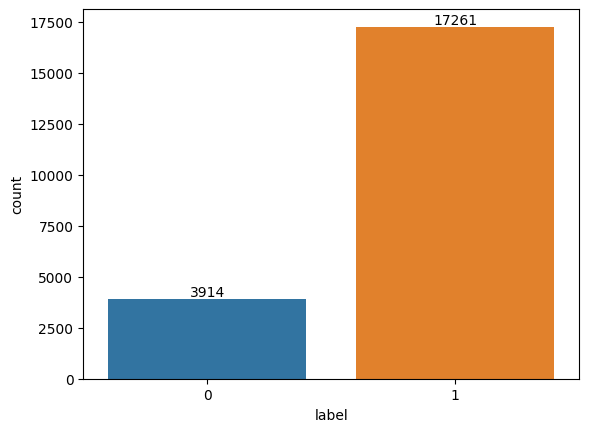

In [38]:
ax = sns.countplot(x="label", data=df)
ax.bar_label(ax.containers[0]);

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [39]:
stop_words = stopwords.words('english')

In [40]:
def cleaning(data):

    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())

    #2. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    #joining
    return " ".join(text_cleaned)

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [41]:
positive_sentences = df[df["label"] == 1]["text"]
positive_sentences = positive_sentences.apply(cleaning)
positive_sentences

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
                               ...                        
21168    bottom cute defiantly cheeky would recommend s...
21169    im impressed beautiful color combination embro...
21171    wasnt sure ordering skirt couldnt see person f...
21172    happy snag dress great price easy slip flatter...
21174    dress lovely platinum feminine fit perfectly e...
Name: text, Length: 17261, dtype: object

In [42]:
negative_sentences = df[df["label"] == 0]["text"]
negative_sentences = negative_sentences.apply(cleaning)
negative_sentences

2        high hope dress really wanted work initially o...
5        love tracy reese dress one petite foot tall us...
10       dress run small esp zipper area run ordered sp...
20       first pullover styling side zipper wouldnt pur...
22       loved material didnt really look long dress pu...
                               ...                        
21145    tried color really pretty fun donset want pair...
21146    wanted love jacket soft great color unfortunat...
21155    purchased good price typically love maeve fabr...
21170    surprised positive review product terrible cut...
21173    fit well top see never would worked im glad ab...
Name: text, Length: 3914, dtype: object

### Collect Words (positive and negative separately)

In [43]:
positive_words = " ".join(positive_sentences)
positive_words[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

In [44]:
negative_words = " ".join(negative_sentences)
negative_words[:100]

'high hope dress really wanted work initially ordered petite small usual size found outrageously smal'

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [45]:
from wordcloud import WordCloud

In [46]:
wordcloud_positive = WordCloud(background_color="white", max_words =250)

In [47]:
wordcloud_positive.generate(positive_words)

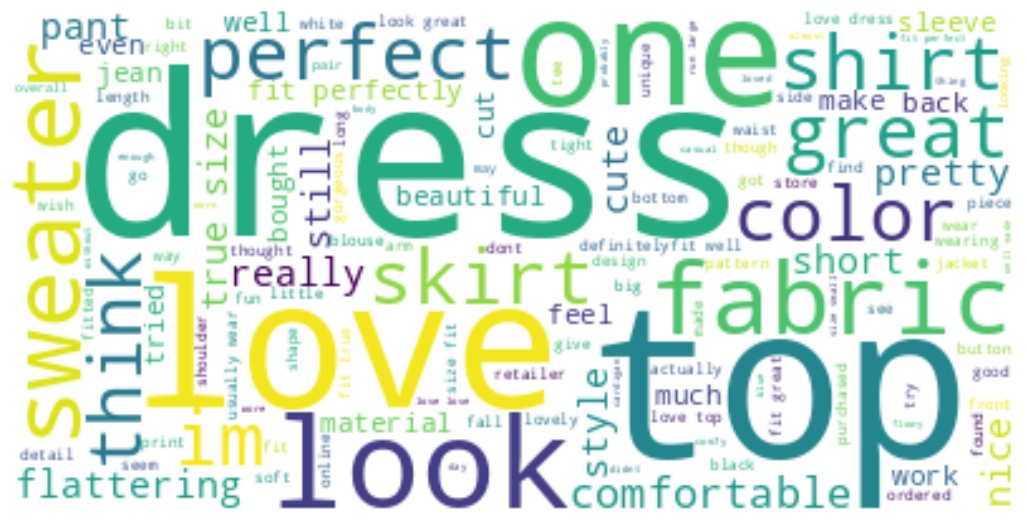

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(wordcloud_positive, interpolation="bilinear",)
plt.axis("off")
plt.show()

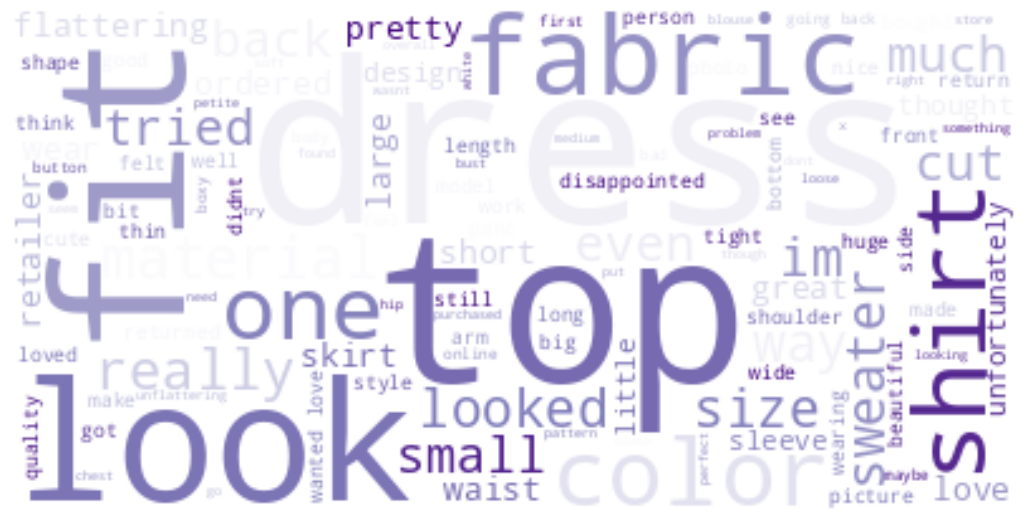

In [49]:
wordcloud_negative = WordCloud(background_color="white", max_words=250, colormap='Purples')

wordcloud_negative.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X = df["text"].values
y = df["label"].map({0:1, 1:0}).values

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

In [54]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [55]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [56]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,abstract,...,yucky,yummy,zero,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16937,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [59]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [60]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,abstract,...,yucky,yummy,zero,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Eval Function

In [61]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [62]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Logistic Regression

### CountVectorizer

In [63]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C =0.01, max_iter=1000, class_weight= "balanced", random_state=101)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [64]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[2990  462]
 [ 108  675]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.91      3452
           1       0.59      0.86      0.70       783

    accuracy                           0.87      4235
   macro avg       0.78      0.86      0.81      4235
weighted avg       0.90      0.87      0.87      4235

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.88      0.92     13809
           1       0.63      0.90      0.74      3131

    accuracy                           0.88     16940
   macro avg       0.80      0.89      0.83     16940
weighted avg       0.91      0.88      0.89     16940



In [65]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-1': make_scorer(precision_score, pos_label=1),
            'recall-1': make_scorer(recall_score, pos_label=1),
            'f1-1': make_scorer(f1_score, pos_label=1)}

model = LogisticRegression(C =0.01, max_iter=1000, class_weight= "balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.870956
test_precision-1    0.606213
test_recall-1       0.863305
test_f1-1           0.712183
dtype: float64

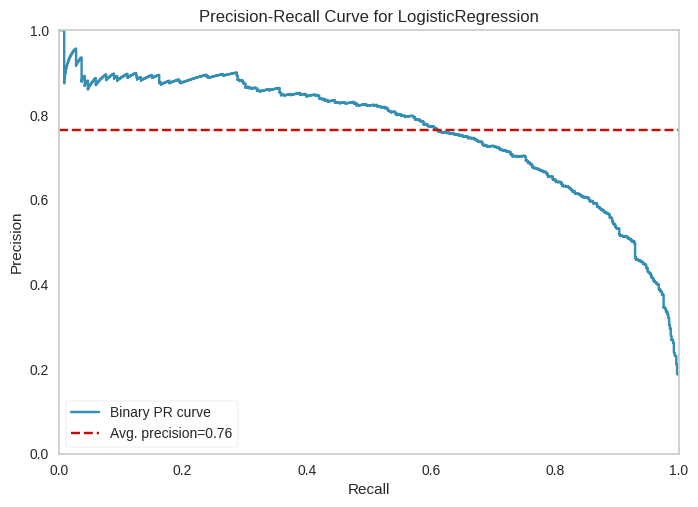

In [66]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    LogisticRegression(C =0.01, max_iter=1000, class_weight= "balanced", random_state=101),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [67]:
y_pred = log.predict(X_test_count)
log_AP_count = viz.score_
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [68]:
log = LogisticRegression(C=0.06, max_iter=1000, random_state=101, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.06, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [69]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[2961  491]
 [  95  688]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3452
           1       0.58      0.88      0.70       783

    accuracy                           0.86      4235
   macro avg       0.78      0.87      0.81      4235
weighted avg       0.90      0.86      0.87      4235

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     13809
           1       0.61      0.90      0.73      3131

    accuracy                           0.88     16940
   macro avg       0.79      0.89      0.83     16940
weighted avg       0.91      0.88      0.89     16940



In [70]:
model = LogisticRegression(C=0.06, max_iter=1000, random_state=101, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.867532
test_precision-1    0.596356
test_recall-1       0.879277
test_f1-1           0.710588
dtype: float64

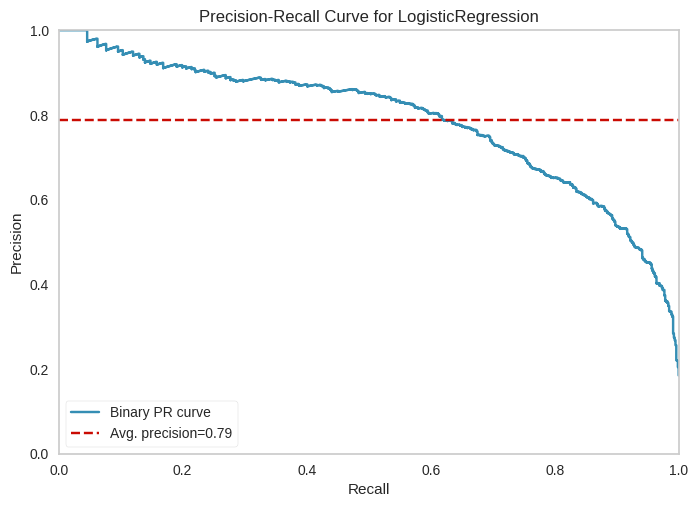

In [71]:
viz = PrecisionRecallCurve(
    LogisticRegression(C=0.06, max_iter=1000, random_state=101, class_weight="balanced"),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [72]:
y_pred = log.predict(X_test_tf_idf)
log_AP_tfidf = viz.score_
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

## Naive Bayes

### Countvectorizer

In [73]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB(alpha=0.7)
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=0.7)

In [74]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[3227  225]
 [ 162  621]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3452
           1       0.73      0.79      0.76       783

    accuracy                           0.91      4235
   macro avg       0.84      0.86      0.85      4235
weighted avg       0.91      0.91      0.91      4235

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     13809
           1       0.75      0.86      0.80      3131

    accuracy                           0.92     16940
   macro avg       0.86      0.90      0.88     16940
weighted avg       0.93      0.92      0.92     16940



In [75]:
model = MultinomialNB(alpha=0.7)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.903896
test_precision-1    0.715647
test_recall-1       0.797831
test_f1-1           0.754327
dtype: float64

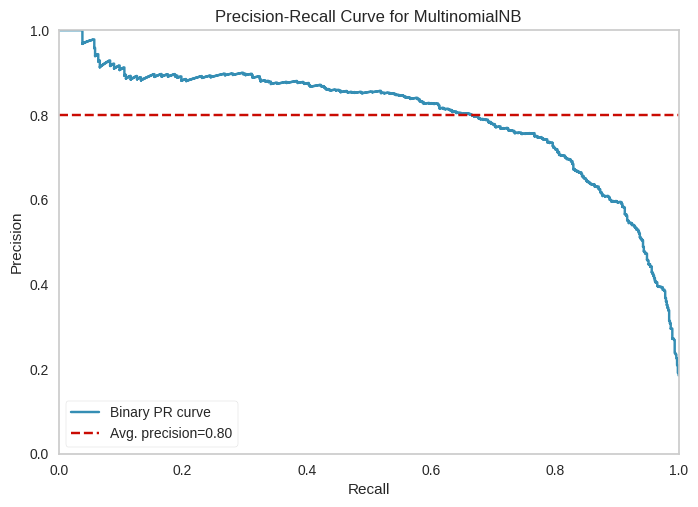

In [76]:
viz = PrecisionRecallCurve(
    MultinomialNB(alpha=0.7),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [77]:
y_pred = nb.predict(X_test_count)
nb_AP_count = viz.score_
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [78]:
nb = BernoulliNB(alpha=0.6)
nb.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=0.6)

In [79]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[3212  240]
 [ 174  609]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3452
           1       0.72      0.78      0.75       783

    accuracy                           0.90      4235
   macro avg       0.83      0.85      0.84      4235
weighted avg       0.91      0.90      0.90      4235

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     13809
           1       0.75      0.84      0.80      3131

    accuracy                           0.92     16940
   macro avg       0.86      0.89      0.87     16940
weighted avg       0.93      0.92      0.92     16940



In [80]:
model = BernoulliNB(alpha=0.6)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.899174
test_precision-1    0.705369
test_recall-1       0.781539
test_f1-1           0.741384
dtype: float64

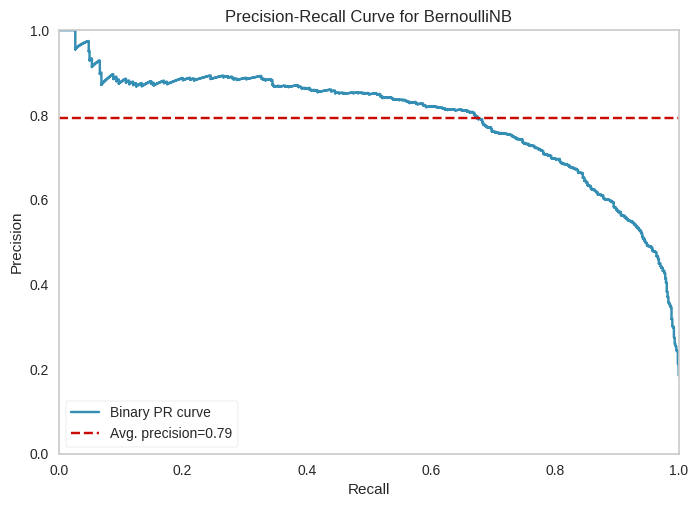

In [81]:
viz = PrecisionRecallCurve(
    BernoulliNB(alpha=0.6),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [82]:
y_pred = nb.predict(X_test_tf_idf)
nb_AP_tfidf = viz.score_
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [83]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.001, class_weight="balanced", random_state=101)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.001, class_weight='balanced', random_state=101)

In [84]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[2992  460]
 [ 108  675]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.91      3452
           1       0.59      0.86      0.70       783

    accuracy                           0.87      4235
   macro avg       0.78      0.86      0.81      4235
weighted avg       0.90      0.87      0.87      4235

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.88      0.93     13809
           1       0.63      0.90      0.74      3131

    accuracy                           0.89     16940
   macro avg       0.80      0.89      0.83     16940
weighted avg       0.91      0.89      0.89     16940



In [85]:
model = LinearSVC(C=0.001, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.872255
test_precision-1    0.608898
test_recall-1       0.865543
test_f1-1           0.714780
dtype: float64

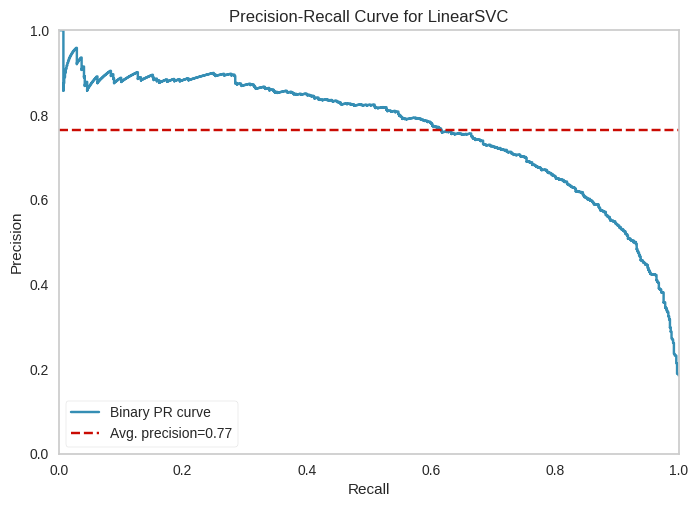

In [86]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.001, class_weight="balanced", random_state=101),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [87]:
y_pred = svc.predict(X_test_count)
svc_AP_count = viz.score_
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

### TD-IDF

In [88]:
svc = LinearSVC(C=0.03, class_weight="balanced", random_state=101)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.03, class_weight='balanced', random_state=101)

In [89]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[3022  430]
 [  94  689]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      3452
           1       0.62      0.88      0.72       783

    accuracy                           0.88      4235
   macro avg       0.79      0.88      0.82      4235
weighted avg       0.90      0.88      0.88      4235

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     13809
           1       0.66      0.93      0.77      3131

    accuracy                           0.90     16940
   macro avg       0.82      0.91      0.85     16940
weighted avg       0.92      0.90      0.90     16940



In [90]:
model = LinearSVC(C=0.03, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.882645
test_precision-1    0.630400
test_recall-1       0.883747
test_f1-1           0.735807
dtype: float64

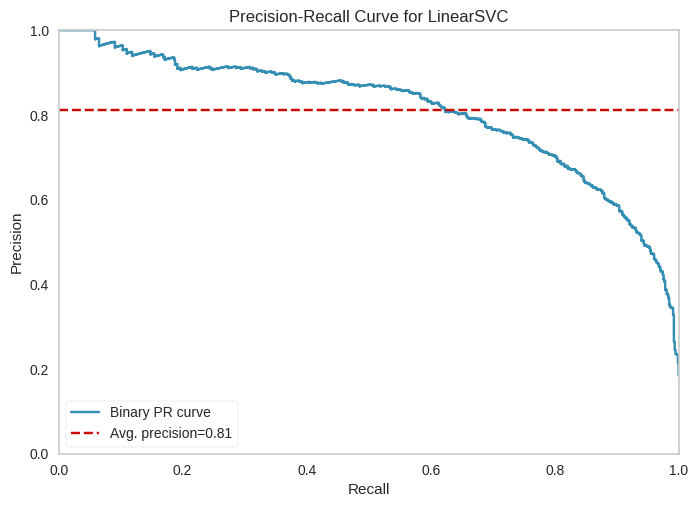

In [91]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.03, class_weight="balanced", random_state=101),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [92]:
y_pred = svc.predict(X_test_tf_idf)
svc_AP_tfidf = viz.score_
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

## Random Forest

### Countvectorizer

In [93]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, n_jobs=-1,
                       random_state=42)

In [94]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[3001  451]
 [ 141  642]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      3452
           1       0.59      0.82      0.68       783

    accuracy                           0.86      4235
   macro avg       0.77      0.84      0.80      4235
weighted avg       0.89      0.86      0.87      4235

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     13809
           1       0.64      0.88      0.74      3131

    accuracy                           0.89     16940
   macro avg       0.81      0.89      0.83     16940
weighted avg       0.91      0.89      0.89     16940



In [95]:
model = RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.860685
test_precision-1    0.589998
test_recall-1       0.809327
test_f1-1           0.682366
dtype: float64

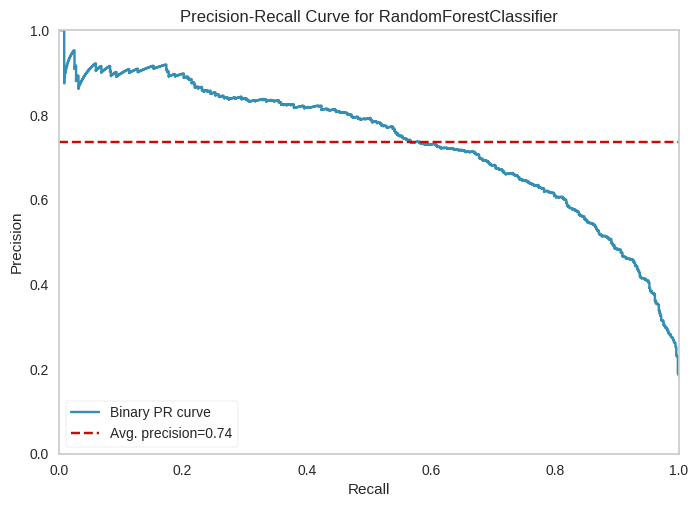

In [96]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced"),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [97]:
y_pred = rf.predict(X_test_count)
rf_AP_count = viz.score_
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [98]:
rf = RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, n_jobs=-1,
                       random_state=42)

In [99]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[2956  496]
 [ 145  638]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      3452
           1       0.56      0.81      0.67       783

    accuracy                           0.85      4235
   macro avg       0.76      0.84      0.78      4235
weighted avg       0.88      0.85      0.86      4235

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.88      0.92     13809
           1       0.62      0.90      0.73      3131

    accuracy                           0.88     16940
   macro avg       0.80      0.89      0.83     16940
weighted avg       0.91      0.88      0.89     16940



In [100]:
model = RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.848583
test_precision-1    0.563920
test_recall-1       0.801016
test_f1-1           0.661677
dtype: float64

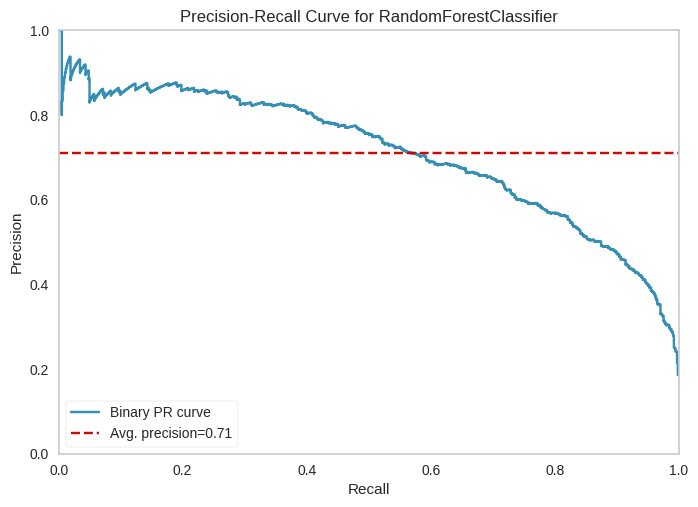

In [101]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced"),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [102]:
y_pred = rf.predict(X_test_tf_idf)
rf_AP_tfidf = viz.score_
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test,y_pred)

## Ada Boosting

### Countvectorizer

In [103]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42, learning_rate=0.8)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=500, random_state=42)

In [104]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[3299  153]
 [ 294  489]]
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3452
           1       0.76      0.62      0.69       783

    accuracy                           0.89      4235
   macro avg       0.84      0.79      0.81      4235
weighted avg       0.89      0.89      0.89      4235

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     13809
           1       0.86      0.72      0.78      3131

    accuracy                           0.93     16940
   macro avg       0.90      0.85      0.87     16940
weighted avg       0.92      0.93      0.92     16940



In [105]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42, learning_rate=0.8)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.900354
test_precision-1    0.780605
test_recall-1       0.641328
test_f1-1           0.703990
dtype: float64

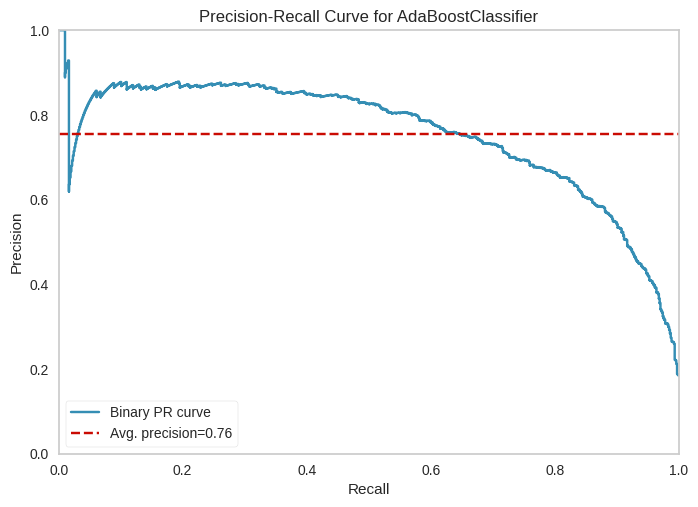

In [106]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42, learning_rate=0.8),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [107]:
y_pred = ada.predict(X_test_count)
ada_AP_count = viz.score_
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [108]:
ada = AdaBoostClassifier(n_estimators= 200, random_state = 42, learning_rate=0.8)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=200, random_state=42)

In [109]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[3287  165]
 [ 311  472]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3452
           1       0.74      0.60      0.66       783

    accuracy                           0.89      4235
   macro avg       0.83      0.78      0.80      4235
weighted avg       0.88      0.89      0.88      4235

Train_Set
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     13809
           1       0.83      0.67      0.74      3131

    accuracy                           0.91     16940
   macro avg       0.88      0.82      0.84     16940
weighted avg       0.91      0.91      0.91     16940



In [110]:
model = AdaBoostClassifier(n_estimators= 200, random_state = 42, learning_rate=0.8)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.895041
test_precision-1    0.781137
test_recall-1       0.602047
test_f1-1           0.679538
dtype: float64

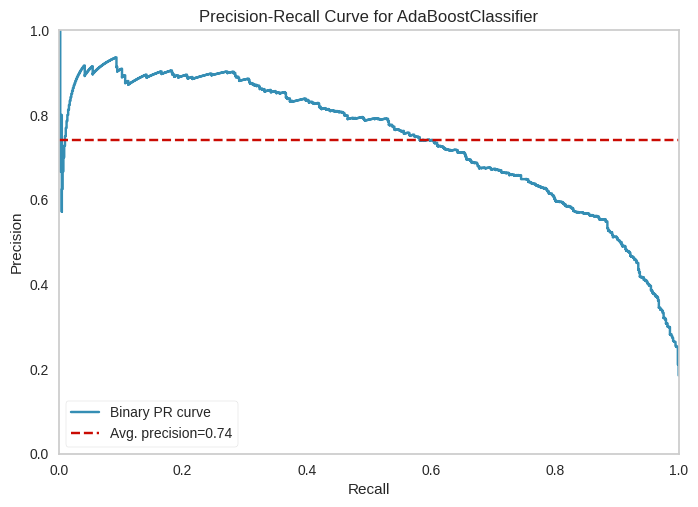

In [111]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 200, random_state = 42, learning_rate=0.8),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [112]:
y_pred = ada.predict(X_test_tf_idf)
ada_AP_tfidf = viz.score_
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test,y_pred)

## DL modeling

In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [114]:
df

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
21170,I was surprised at the positive reviews for th...,0
21171,So i wasn't sure about ordering this skirt bec...,1
21172,I was very happy to snag this dress at such a ...,1
21173,"This fit well, but the top was very see throug...",0


In [115]:
df.shape

(21175, 2)

### Tokenization

In [116]:
num_words = 15000
tokenizer = Tokenizer(num_words=num_words)

In [117]:
tokenizer.fit_on_texts(X)

### Creating word index

In [118]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'so': 15,
 'was': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'are': 26,
 'fit': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'wear': 31,
 'me': 32,
 "it's": 33,
 'great': 34,
 'or': 35,
 'too': 36,
 "i'm": 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'they': 41,
 'up': 42,
 'would': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'more': 49,
 'perfect': 50,
 'really': 51,
 'little': 52,
 'ordered': 53,
 'if': 54,
 'these': 55,
 'will': 56,
 'one': 57,
 'flattering': 58,
 'soft': 59,
 'well': 60,
 'an': 61,
 'out': 62,
 'can': 63,
 'comfortable': 64,
 'back': 65,
 'because': 66,
 'had': 67,
 'bought': 68,
 '\r': 69,
 'nice': 70,
 'cute': 71,
 'beautiful': 72,
 'than': 73,
 'fits': 74,
 'looks': 75,
 'all': 76,
 'when': 77,
 'bit': 78,
 'down': 79,


In [119]:
len(tokenizer.word_index)

14389

### Converting tokens to numeric

In [120]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [121]:
X[100]

'The shirt is exactly as it is pictured, i have the burnt orange color and love it! i received numerous compliments both paired with jeans and tucked into a fun skirt. it fits true to size, as i normally wear a small in all retailer however it is the slightest bit tight in the shoulders. i would give this top a 5/5.'

In [122]:
print(X_num_tokens[100])

[1, 80, 6, 473, 30, 5, 6, 390, 2, 24, 1, 1909, 486, 47, 3, 21, 5, 2, 238, 2140, 198, 190, 545, 14, 90, 3, 870, 311, 4, 276, 108, 5, 74, 124, 8, 22, 30, 2, 240, 31, 4, 46, 9, 76, 102, 151, 5, 6, 1, 2848, 78, 149, 9, 1, 204, 2, 43, 318, 7, 25, 4, 264, 264]


### Maximum number of tokens for all documents¶

In [123]:
len(X_num_tokens[100])

63

In [124]:
len(X_num_tokens[150])

30

In [125]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [126]:
num_tokens.mean()

60.2330106257379

In [127]:
num_tokens.max()

116

In [128]:
num_tokens.argmax()

15213

In [129]:
X[15213]

"I love maeve tops. i love the material and feel of this brand. when i saw the new tops that came out i ran to my local store to try one on. i'm usually a large in a top, once in a while an xl. they only had a large to try so i tried it in the black motif.\ni could barely get the top on. it looked like i was missing 1/2 of the top. i doubled checked the size and it was a large.\nit's a shame, the top is really cute. if you are the least bit broad or busty, go up a size or two. if you are usually a"

In [130]:
max_tokens = 116

In [131]:
sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

### Fixing token counts of all documents (pad_sequences)

In [132]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [133]:
X_pad.shape

(21175, 116)

In [134]:
np.array(X_num_tokens[500])

array([   2,  104,    7,   18,   11,    3,  280,  358,    9,    5,    2,
         92,  695,    3, 1300,   17,  859,   17, 1443,    2, 1908, 3320,
          2,  285,  228,   54,    2,  347,   24,   68,    7,   57,    3,
       1908, 3320,    8,   29, 2331,   14,   32, 1170,  325,    5,  166,
         34,    3, 1170,   16,  299,    2,   68,    5,   15,   34,   12,
          4,  320,  576,   74,  124,    8,   22,    2,   38,  734,  308,
        687,  868,    3,    2,   68,   17,  383,   22,  407,    7,  116,
         17,   95,   48,   51,   46])

In [135]:
X_pad[500]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    2,  104,    7,   18,   11,    3,  280,  358,    9,    5,
          2,   92,  695,    3, 1300,   17,  859,   17, 1443,    2, 1908,
       3320,    2,  285,  228,   54,    2,  347,   24,   68,    7,   57,
          3, 1908, 3320,    8,   29, 2331,   14,   32, 1170,  325,    5,
        166,   34,    3, 1170,   16,  299,    2,   68,    5,   15,   34,
         12,    4,  320,  576,   74,  124,    8,   22,    2,   38,  734,
        308,  687,  868,    3,    2,   68,   17,  383,   22,  407,    7,
        116,   17,   95,   48,   51,   46], dtype=int32)

In [136]:
np.array(X_num_tokens[15213])

array([   2,   21,  759,  222,    2,   21,    1,   83,    3,  144,   13,
          7,  479,   77,    2,  192,    1,  438,  222,   20,  362,   62,
          2,  522,    8,   17,  485,  105,    8,  180,   57,   11,   37,
        107,    4,   82,    9,    4,   25,  425,    9,    4,  242,   61,
        419,   41,  114,   67,    4,   82,    8,  180,   15,    2,  104,
          5,    9,    1,  120,  769,    2,  117,  804,  113,    1,   25,
         11,    5,  166,   28,    2,   16, 1633,  527,  160,   13,    1,
         25,    2, 3982, 1761,    1,   22,    3,    5,   16,    4,   82,
         33,    4, 1396,    1,   25,    6,   51,   71,   54,   40,   26,
          1,  523,   78,  676,   35,  593,  143,   42,    4,   22,   35,
        265,   54,   40,   26,  107,    4])

In [137]:
X_pad[15213]

array([   2,   21,  759,  222,    2,   21,    1,   83,    3,  144,   13,
          7,  479,   77,    2,  192,    1,  438,  222,   20,  362,   62,
          2,  522,    8,   17,  485,  105,    8,  180,   57,   11,   37,
        107,    4,   82,    9,    4,   25,  425,    9,    4,  242,   61,
        419,   41,  114,   67,    4,   82,    8,  180,   15,    2,  104,
          5,    9,    1,  120,  769,    2,  117,  804,  113,    1,   25,
         11,    5,  166,   28,    2,   16, 1633,  527,  160,   13,    1,
         25,    2, 3982, 1761,    1,   22,    3,    5,   16,    4,   82,
         33,    4, 1396,    1,   25,    6,   51,   71,   54,   40,   26,
          1,  523,   78,  676,   35,  593,  143,   42,    4,   22,   35,
        265,   54,   40,   26,  107,    4], dtype=int32)

### Train Set Split

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=101)

### Modeling

In [140]:
model = Sequential()

In [141]:
embedding_size = 50

In [142]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))


model.add(GRU(units=48, return_sequences=True))
#model.add(Dropout(0.5))
#model.add(GRU(units=24, return_sequences=True))
#model.add(Dropout(0.5))
model.add(GRU(units=24))
model.add(Dense(1, activation='sigmoid'))

In [143]:
optimizer = Adam(lr=0.001)

In [144]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [145]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 116, 50)           750000    
                                                                 
 gru (GRU)                   (None, 116, 48)           14400     
                                                                 
 gru_1 (GRU)                 (None, 24)                5328      
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 769,753
Trainable params: 769,753
Non-trainable params: 0
_________________________________________________________________


In [146]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max",
                           verbose=1, patience = 2, restore_best_weights=True)

In [147]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([0.61339642, 2.70465512])

In [148]:
model.fit(X_train, y_train, epochs=25, batch_size=128, sample_weight=classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/25
149/149 [==============================] - 20s 108ms/step - loss: 0.4355 - recall: 0.7102 - val_loss: 0.2934 - val_recall: 0.8900
Epoch 2/25
149/149 [==============================] - 15s 103ms/step - loss: 0.2269 - recall: 0.9268 - val_loss: 0.3089 - val_recall: 0.9054
Epoch 3/25
149/149 [==============================] - 15s 103ms/step - loss: 0.1726 - recall: 0.9560 - val_loss: 0.4351 - val_recall: 0.9079
Epoch 4/25
149/149 [==============================] - 15s 100ms/step - loss: 0.1385 - recall: 0.9671 - val_loss: 0.3502 - val_recall: 0.8977
Epoch 5/25
149/149 [==============================] - 15s 103ms/step - loss: 0.1127 - recall: 0.9798 - val_loss: 0.2806 - val_recall: 0.7749
Epoch 5: early stopping


### Model Evaluation

In [149]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.435501,0.710190,0.293409,0.890026
1,0.226854,0.926767,0.308857,0.905371
2,0.172590,0.956003,0.435081,0.907928
3,0.138488,0.967074,0.350214,0.897698
4,0.112698,0.979847,0.280619,0.774936


<Axes: >

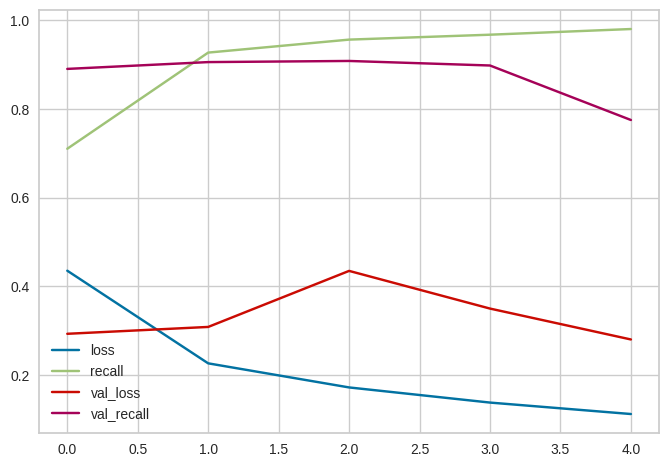

In [150]:
model_loss.plot()

In [151]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

596/596 [==============================] - 10s 15ms/step
[[13803  1731]
 [   18  3505]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     15534
           1       0.67      0.99      0.80      3523

    accuracy                           0.91     19057
   macro avg       0.83      0.94      0.87     19057
weighted avg       0.94      0.91      0.91     19057



In [152]:
y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

67/67 [==============================] - 1s 15ms/step
[[1434  293]
 [  36  355]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      1727
           1       0.55      0.91      0.68       391

    accuracy                           0.84      2118
   macro avg       0.76      0.87      0.79      2118
weighted avg       0.90      0.84      0.86      2118



In [153]:
from sklearn.metrics import precision_recall_curve, average_precision_score

67/67 [==============================] - 1s 15ms/step


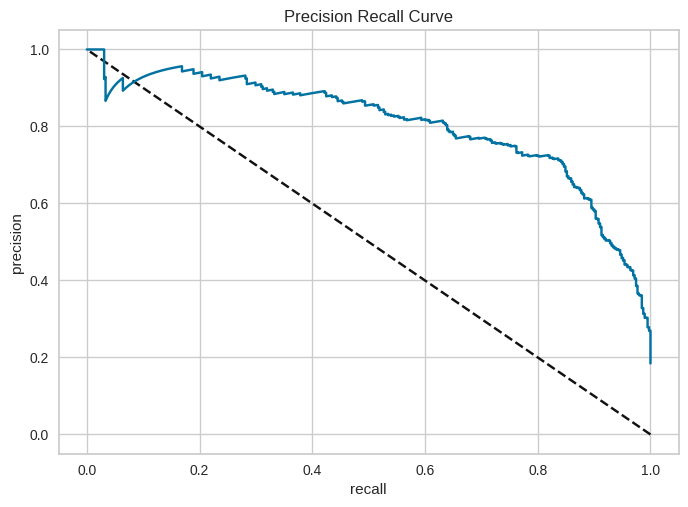

In [154]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision Recall Curve')
plt.show()

In [155]:
average_precision_score(y_test, y_pred_proba)

0.8058939878449936

In [156]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

In [157]:
!pip install transformers

### Read Data

In [158]:
df

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
21170,I was surprised at the positive reviews for th...,0
21171,So i wasn't sure about ordering this skirt bec...,1
21172,I was very happy to snag this dress at such a ...,1
21173,"This fit well, but the top was very see throug...",0


In [159]:
df.shape

(21175, 2)

### Train test split

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

### Tokenization

In [162]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

max_len = 0

# For every sentence...
max_token = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

    input_ids = tokenizer.encode(sent.lower(), add_special_tokens=True)
    max_token.append(len(input_ids))

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  162


In [163]:
np.array(max_token).mean()

76.31556080283353

In [164]:
sum(np.array(max_token) <= 162) / len(max_token)

1.0

In [335]:
def transformation(X):
  # set array dimensions
  seq_len = 160
  num_samples = len(X)

  # initialize empty zero arrays
  Xids = np.zeros((num_samples, seq_len))
  Xmask = np.zeros((num_samples, seq_len))


  for i, phrase in enumerate(X):
      tokens = tokenizer.encode_plus(phrase.lower(), max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True)
      # assign tokenized outputs to respective rows in numpy arrays
      Xids[i, :] = tokens['input_ids']
      Xmask[i, :] = tokens['attention_mask']
  return Xids, Xmask

In [166]:
Xids, Xmask = transformation(X)

In [167]:
Xids.shape

(21175, 162)

In [168]:
labels = y.reshape(-1,1)
labels

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

### Fixing token counts of all documents

In [169]:
max_token = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    max_token.append(len(input_ids))

print('Max sentence length: ', max(max_token))

Max sentence length:  162


In [170]:
list = [5, 10, 8, 9, 12, 15, 4]
print(np.array(list) <= 10)
print(sum(np.array(list) <= 10)/len(list))

[ True  True  True  True False False  True]
0.7142857142857143


In [171]:
np.array(max_token).mean()

76.31556080283353

In [172]:
sum(np.array(max_token) < 160) / len(max_token)

0.9999527744982291

### Transformation Vectors to Matrices

In [173]:
sentence = "Love this dress! it's sooo pretty."
tokens = tokenizer.encode_plus(sentence, add_special_tokens=True)
print(tokens)

{'input_ids': [101, 2293, 2023, 4377, 999, 2009, 1005, 1055, 17111, 2080, 3492, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [334]:
tokens = tokenizer.encode_plus(sentence, max_length=160, truncation=True,
                              padding='max_length', add_special_tokens=True)
tokens

{'input_ids': [101, 2293, 2023, 4377, 999, 2009, 1005, 1055, 17111, 2080, 3492, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [175]:
seq_len = 160
num_samples = len(X)

Xids = np.zeros((num_samples, seq_len))
Xmask = np.zeros((num_samples, seq_len))

In [176]:
Xids[:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [177]:
Xmask[:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [178]:
print(tokens['input_ids'])
print(tokens['attention_mask'])

[101, 2293, 2023, 4377, 999, 2009, 1005, 1055, 17111, 2080, 3492, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [179]:
Xids[0] = tokens['input_ids']
Xmask[0] = tokens['attention_mask']

In [180]:
Xids[0]

array([  101.,  2293.,  2023.,  4377.,   999.,  2009.,  1005.,  1055.,
       17111.,  2080.,  3492.,  1012.,   102.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
      

In [181]:
Xmask[0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [333]:
def transformation(X):
  # set array dimensions
  seq_len = 160
  num_samples = len(X)

  # initialize empty zero arrays
  Xids = np.zeros((num_samples, seq_len))
  Xmask = np.zeros((num_samples, seq_len))


  for i, phrase in enumerate(X):
      tokens = tokenizer.encode_plus(phrase, max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True)

      # assign tokenized outputs to respective rows in numpy arrays
      Xids[i] = tokens['input_ids']
      Xmask[i] = tokens['attention_mask']
  return Xids, Xmask

In [292]:
Xids_train, Xmask_train = transformation(X_train)

Xids_test, Xmask_test = transformation(X_test)

In [293]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (19057, 162)
Xmask_train.shape : (19057, 162)
Xids_test.shape   : (2118, 162)
Xmask_test.shape  : (2118, 162)


In [295]:
y_train

array([1, 0, 0, ..., 0, 0, 1])

In [296]:
labels_train = y_train.reshape(-1,1)
labels_train

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [297]:
y_test

array([0, 0, 0, ..., 0, 1, 0])

In [298]:
labels_test = y_test.reshape(-1,1)
labels_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [299]:
from tensorflow.keras.utils import to_categorical

l = np.array([0, 1, 3, 5, 4, 2])
to_categorical(l, 6)

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

### Transformation Matrix to Tensorflow tensor

In [307]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train,
                                                    Xmask_train,
                                                    labels_train))
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [308]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test,
                                                   Xmask_test,
                                                   labels_test))
dataset_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [309]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [310]:
# then we use the dataset map method to apply this transformation
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [311]:
dataset_train

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.float64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [312]:
dataset_test

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.float64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [313]:
batch_size = 32

# batch_size
# fit into a batch of 32
train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)

### Creating optimization

In [315]:
!pip install -q tf-models-official

In [316]:
from official.nlp import optimization
epochs = 1
#batch_size = 32
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [317]:
print(len(train_ds)*2)
print(int(0.1*len(train_ds)*2))

1192
119


### Creating Model with TPU

In [318]:
def create_model():
    from transformers import TFAutoModel #TFBertModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = Dense(80, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name="dropout")(x) #0.1
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [321]:
with strategy.scope():

  optimizer = optimizer
  loss = tf.keras.losses.BinaryCrossentropy()
  recall = tf.keras.metrics.Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [322]:
model3.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 162)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 162)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 162,                                         

### Model Fiting

In [323]:
history = model3.fit(
    train_ds, validation_data= val_ds,
    epochs=epochs)

596/596 [==============================] - 219s 206ms/step - loss: 0.5590 - recall_9: 0.8567 - val_loss: 0.4313 - val_recall_9: 0.9079


### Model evaluation

In [325]:
model_loss = pd.DataFrame(model3.history.history)
model_loss.head()

,loss,recall_9,val_loss,val_recall_9
0,0.559027,0.856656,0.431323,0.907928


In [326]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5

y_test = [j for i in val_ds for j in np.array(i[1])]


print(classification_report(y_test, y_pred))

67/67 [==============================] - 19s 166ms/step


Exception ignored in: <function Executor.__del__ at 0x7861a0514e50>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1727
           1       0.77      0.91      0.83       391

    accuracy                           0.93      2118
   macro avg       0.87      0.92      0.89      2118
weighted avg       0.94      0.93      0.93      2118



In [327]:
y_train_pred = model3.predict(train_ds) >= 0.5

y_train = [j for i in train_ds for j in np.array(i[1])]

print(classification_report(y_train, y_train_pred))

596/596 [==============================] - 27s 36ms/step


Exception ignored in: <function Executor.__del__ at 0x7861a0514e50>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


              precision    recall  f1-score   support

           0       0.98      0.96      0.97     15534
           1       0.83      0.91      0.87      3523

    accuracy                           0.95     19057
   macro avg       0.90      0.93      0.92     19057
weighted avg       0.95      0.95      0.95     19057



67/67 [==============================] - 5s 29ms/step


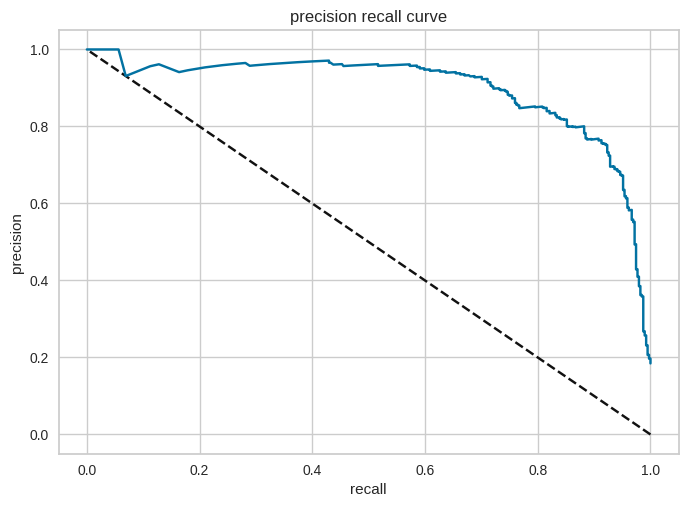

In [328]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_pred_proba = model3.predict(val_ds)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve')
plt.show()

In [329]:
average_precision_score(y_test, y_pred_proba)

0.8990802860539805

In [330]:
BERT_without_weighted_AP = average_precision_score(y_test, y_pred_proba)
BERT_without_weighted_f1 = f1_score(y_test, y_pred)
BERT_without_weighted_rec = recall_score(y_test, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

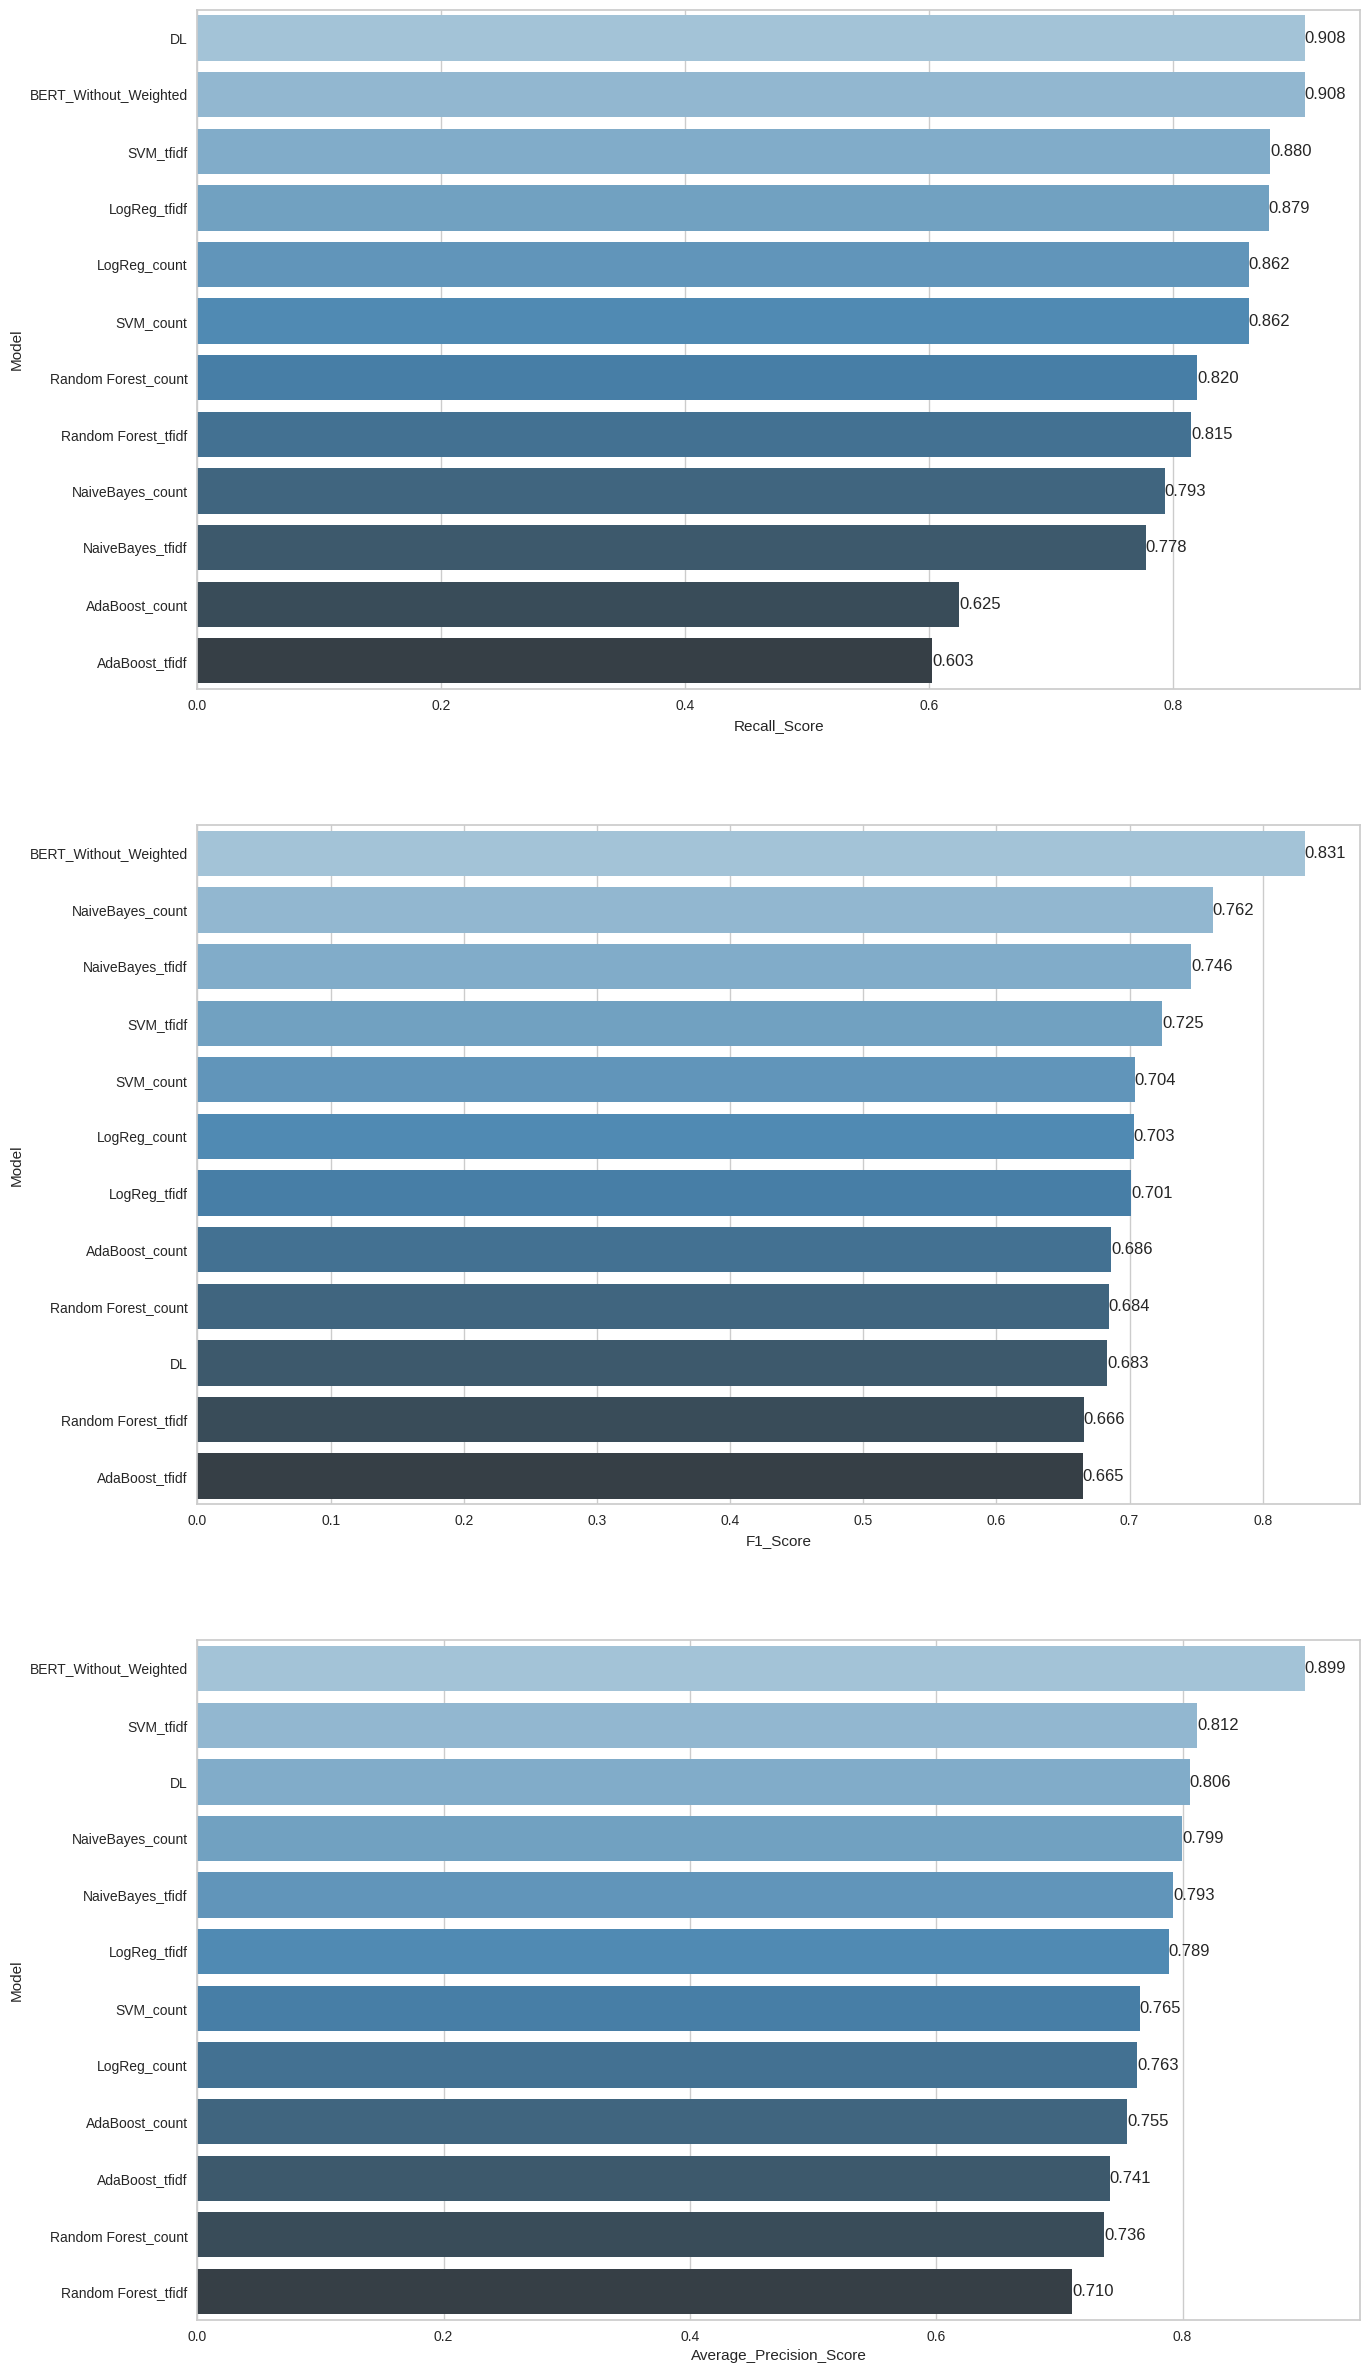

In [337]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count",
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf",
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL",  "BERT_Without_Weighted"],

                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1,
                                             rf_count_f1, ada_count_f1, nb_tfidf_f1, log_tfidf_f1,
                                             svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1,  BERT_without_weighted_f1],

                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec,
                                                   rf_count_rec, ada_count_rec,
                                                  nb_tfidf_rec, log_tfidf_rec, svc_tfidf_rec,
                                                  rf_tfidf_rec, ada_tfidf_rec, DL_rec, BERT_without_weighted_rec],

                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count,
                                                   ada_AP_count, nb_AP_tfidf, log_AP_tfidf, svc_AP_tfidf,
                                                   rf_AP_tfidf, ada_AP_tfidf, DL_AP,  BERT_without_weighted_AP]})

def labels(ax):

    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment

plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax=sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show();

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___